In [1]:
# Menghitung jumlah dan persentase missing values di setiap kolom
import pandas as pd
from sklearn.preprocessing import LabelEncoder
df_lencoder = pd.read_csv('diabetes.csv')
missing_values = df_lencoder.isnull().sum()
missing_percentage = (missing_values / len(df_lencoder)) * 100

missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
}).sort_values(by='Missing Values', ascending=False)

missing_data[missing_data['Missing Values'] > 0]  # Menampilkan kolom dengan missing values

,Missing Values,Percentage


In [ ]:
import matplotlib.pyplot as plt
# Menghitung jumlah variabel
num_vars = df_lencoder.shape[1]

# Menentukan jumlah baris dan kolom untuk grid subplot
n_cols = 4  # Jumlah kolom yang diinginkan
n_rows = -(-num_vars // n_cols)  # Ceiling division untuk menentukan jumlah baris

# Membuat subplot
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))

# Flatten axes array untuk memudahkan iterasi jika diperlukan
axes = axes.flatten()

# Plot setiap variabel
for i, column in enumerate(df_lencoder.columns):
    df_lencoder[column].hist(ax=axes[i], bins=20, edgecolor='black')
    axes[i].set_title(column)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

# Menghapus subplot yang tidak terpakai (jika ada)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Menyesuaikan layout agar lebih rapi
plt.tight_layout()
plt.show()

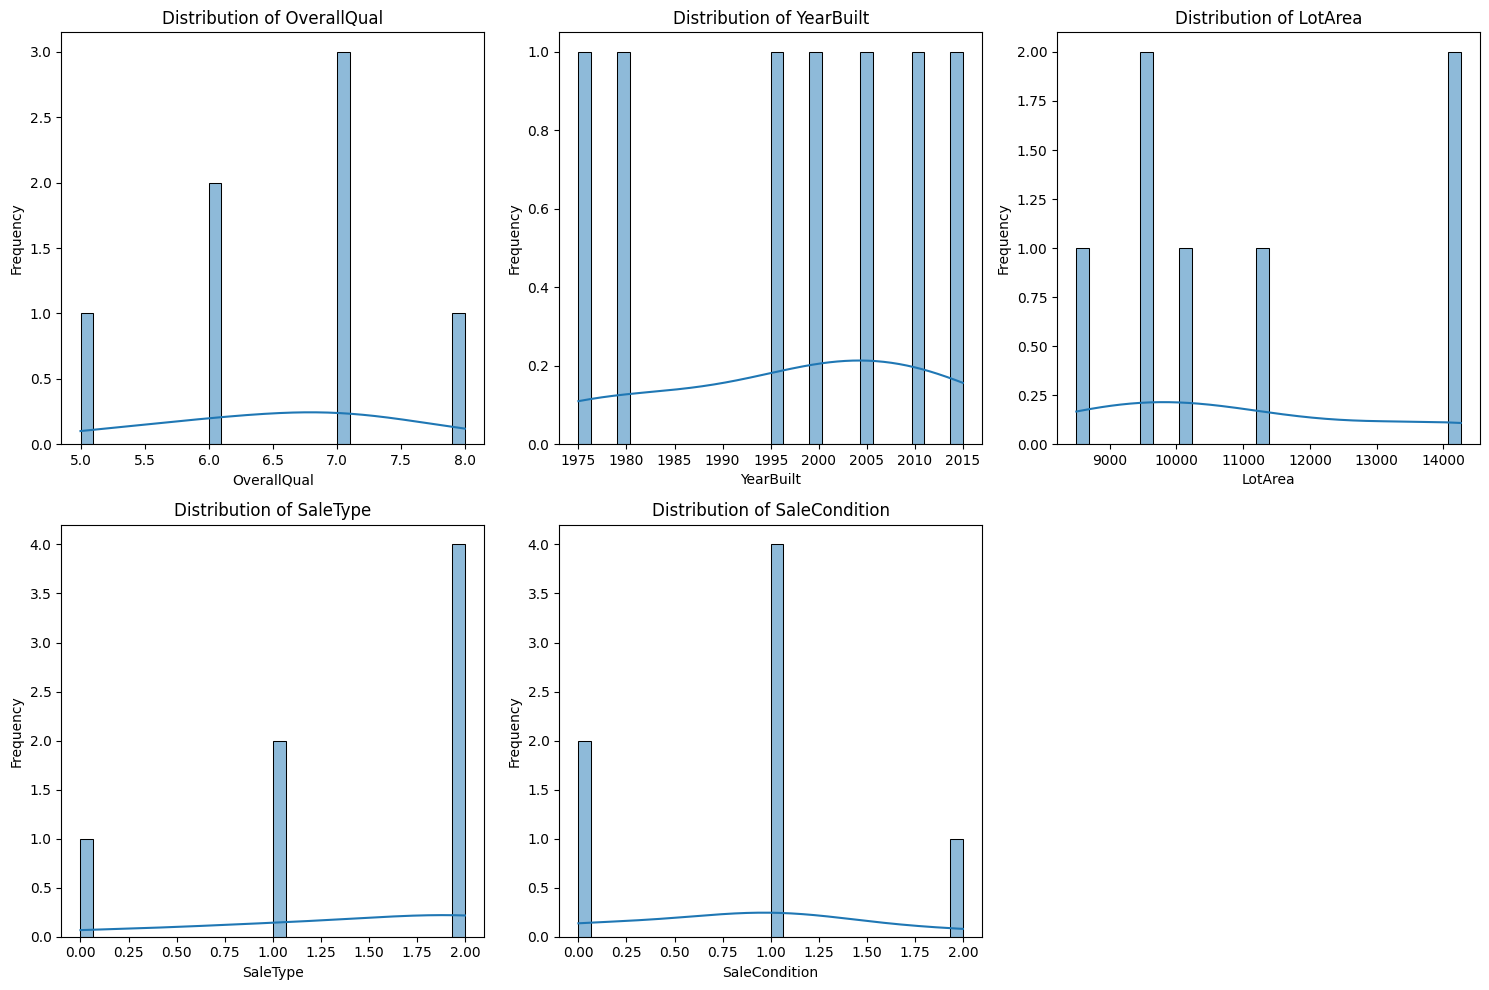

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# --- Contoh inisialisasi dataset ---
data = {
    'OverallQual': [5, 7, 6, 8, 7, 7, 6],
    'YearBuilt': [2000, 1995, 2010, 1980, 1975, 2005, 2015],
    'LotArea': [8500, 9600, 11250, 9550, 14260, 14115, 10084],
    'SaleType': ['WD', 'New', 'WD', 'COD', 'WD', 'New', 'WD'],
    'SaleCondition': ['Normal', 'Abnorml', 'Normal', 'Partial', 'Normal', 'Normal', 'Abnorml']
}
df = pd.DataFrame(data)

# --- Encode kolom kategorikal ---
le = LabelEncoder()
df_lencoder = df.copy()
for col in df.select_dtypes(include=['object']).columns:
    df_lencoder[col] = le.fit_transform(df[col])

# --- Visualisasi distribusi data untuk beberapa kolom ---
columns_to_plot = ['OverallQual', 'YearBuilt', 'LotArea', 'SaleType', 'SaleCondition']

plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df_lencoder[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


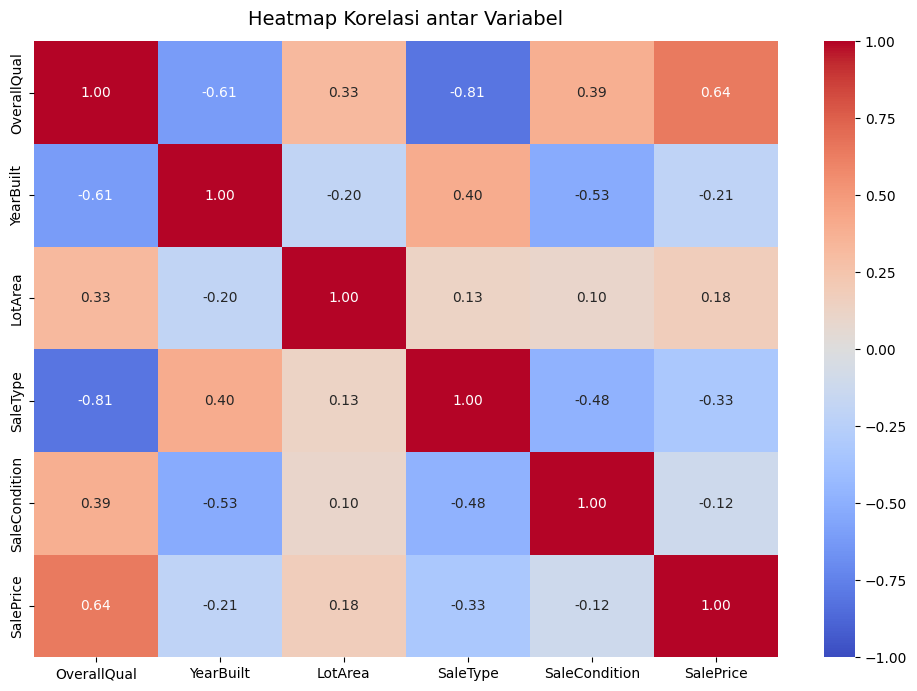

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
# --- Contoh inisialisasi dataset ---
data = {
    'OverallQual': [5, 7, 6, 8, 7, 7, 6],
    'YearBuilt': [2000, 1995, 2010, 1980, 1975, 2005, 2015],
    'LotArea': [8500, 9600, 11250, 9550, 14260, 14115, 10084],
    'SaleType': ['WD', 'New', 'WD', 'COD', 'WD', 'New', 'WD'],
    'SaleCondition': ['Normal', 'Abnorml', 'Normal', 'Partial', 'Normal', 'Normal', 'Abnorml'],
    'SalePrice': [200000, 250000, 230000, 270000, 260000, 240000, 280000]
}
df = pd.DataFrame(data)
# --- Encode kolom kategorikal ---
le = LabelEncoder()
df_lencoder = df.copy()
for col in df.select_dtypes(include=['object']).columns:
    df_lencoder[col] = le.fit_transform(df[col])
# --- Heatmap korelasi ---
correlation_matrix = df_lencoder.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,        # menampilkan angka korelasi
    fmt=".2f",         # format angka 2 desimal
    cmap="coolwarm",   # skema warna
    vmin=-1, vmax=1,   # range nilai korelasi
    cbar=True          # tampilkan color bar
)
plt.title("Heatmap Korelasi antar Variabel", fontsize=14, pad=12)
plt.show()
